In [19]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np


In [20]:
def read_file(filename):
    # Regex pattern to match experiment header and time
    header_pattern = r"file_name: (\w+), chunk_size: (\d+), output_len: (\d+)"
    time_pattern = r"Time: (\d+\.\d+)"

    experiments = defaultdict(list)

    # Read file
    with open(filename, 'r') as f:
        lines = f.readlines()

    experiment_key = None
    for line in lines:
        header_match = re.match(header_pattern, line)
        if header_match:
            experiment_key = header_match.groups()
        else:
            time_match = re.match(time_pattern, line)
            if time_match:
                experiments[experiment_key].append(float(time_match.group(1)))

    # Compute averages
    averages = {key: sum(times)/len(times) for key, times in experiments.items()}
    return averages


In [21]:
parrot = read_file('chunk_size/parrot_main.log')
vllm = read_file('chunk_size/fschat_vllm.log')

In [22]:
print('parrot', parrot)
print('vllm', vllm)

parrot {('article_0', '512', '50'): 14.064466666666668, ('article_0', '1024', '50'): 10.039233333333334, ('article_0', '1536', '50'): 9.2473, ('article_0', '2048', '50'): 8.994200000000001, ('article_1', '512', '50'): 8.4171, ('article_1', '1024', '50'): 7.111933333333333, ('article_1', '1536', '50'): 6.636, ('article_1', '2048', '50'): 6.485666666666667, ('article_2', '512', '50'): 9.571666666666665, ('article_2', '1024', '50'): 8.016966666666667, ('article_2', '1536', '50'): 7.628866666666667, ('article_2', '2048', '50'): 7.442866666666667, ('article_3', '512', '50'): 8.1547, ('article_3', '1024', '50'): 6.7669, ('article_3', '1536', '50'): 6.3988000000000005, ('article_3', '2048', '50'): 6.177166666666667, ('article_4', '512', '50'): 10.374433333333334, ('article_4', '1024', '50'): 8.562433333333333, ('article_4', '1536', '50'): 7.990533333333334, ('article_4', '2048', '50'): 7.831733333333333, ('article_5', '512', '50'): 9.989600000000001, ('article_5', '1024', '50'): 8.2187, ('art

In [23]:

# output_lengths = ['25', '50', '75', '100']
chunk_sizes = ['512', '1024', '1536', '2048']
systems = ['parrot', 'vllm']
hatches = ['', '\\', '/']
colors = [
"#d73027",
"#4575b4"]

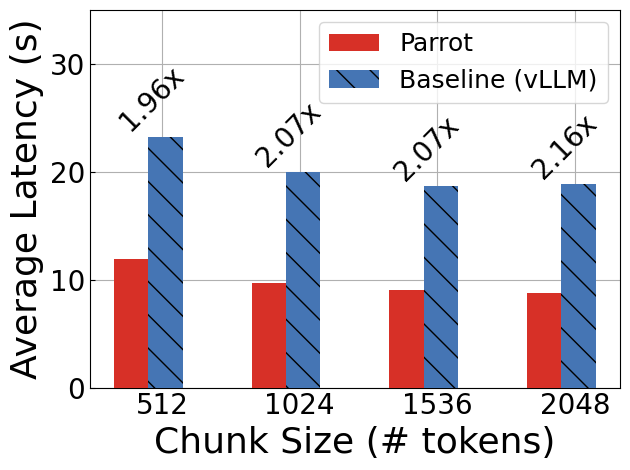

In [27]:
# Organize the data
data = {
    "parrot": parrot,
    "vllm": vllm,
}

names = {
    "parrot": "Parrot",
    "vllm": "Baseline (vLLM)",
}

statistics = {ol: {s: [] for s in systems} for ol in chunk_sizes}

for system, system_data in data.items():
    for key, value in system_data.items():
        chunk_size = key[1]
        statistics[chunk_size][system].append(value)

# Calculate statistics
averages = {ol: {s: np.mean(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}
# mins = {ol: {s: np.min(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}
# maxs = {ol: {s: np.max(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}

# Generate the chart
x = np.arange(len(chunk_sizes))
width = 0.25

fig, ax = plt.subplots()


plt.grid(True)
for i, system in enumerate(systems):
    avg = [averages[ol][system] for ol in chunk_sizes]
#     min_ = [mins[ol][system] for ol in chunk_sizes]
#     max_ = [maxs[ol][system] for ol in chunk_sizes]
    
    rects = ax.bar(x - width/2 + i*width, avg, width,  hatch = hatches[i], color = colors[i], label=names[system],zorder=3) # hatches
    
    # Add speedup values
    if system != 'parrot':
        speedup_values = [averages[ol][system]/averages[ol]['parrot'] for ol in chunk_sizes]
        for rect, speedup in zip(rects, speedup_values):
            height = rect.get_height()
            diff = 0.1 if system == 'vllm' else -0.1
            ax.text(rect.get_x() + rect.get_width() / 2 -diff, height,
                    '{:.2f}x'.format(speedup),
                    ha='center', va='bottom', rotation=45,
                    fontsize=20)
            
plt.legend(loc='upper right', prop = { "size": 18 },)
ax.tick_params(axis='y', labelsize=20, direction='in')
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.set_xlabel('Chunk Size (# tokens)', fontsize=26)
ax.set_ylabel('Average Latency (s)', fontsize=26)
ax.set_xticks([_+0.1 for _ in x])
ax.set_xticklabels(chunk_sizes)
plt.ylim([0,35])

fig.tight_layout()

plt.savefig('mapreduce-csize.pdf')

In [28]:
parrot = read_file('output_len/parrot_main.log')
vllm = read_file('output_len/fschat_vllm.log')

In [29]:
print('parrot', parrot)
print('vllm', vllm)

parrot {('article_0', '1024', '25'): 7.709766666666667, ('article_0', '1024', '50'): 9.844199999999999, ('article_0', '1024', '75'): 12.992933333333333, ('article_0', '1024', '100'): 15.316333333333333, ('article_1', '1024', '25'): 5.3121, ('article_1', '1024', '50'): 6.964466666666667, ('article_1', '1024', '75'): 8.743733333333333, ('article_1', '1024', '100'): 10.689166666666667, ('article_2', '1024', '25'): 6.187033333333333, ('article_2', '1024', '50'): 7.9508, ('article_2', '1024', '75'): 9.874433333333334, ('article_2', '1024', '100'): 12.006833333333333, ('article_3', '1024', '25'): 5.0214, ('article_3', '1024', '50'): 6.7238, ('article_3', '1024', '75'): 8.4645, ('article_3', '1024', '100'): 10.274766666666666, ('article_4', '1024', '25'): 6.626766666666668, ('article_4', '1024', '50'): 8.660866666666665, ('article_4', '1024', '75'): 10.505, ('article_4', '1024', '100'): 12.819133333333333, ('article_5', '1024', '25'): 6.306066666666666, ('article_5', '1024', '50'): 8.17343333

In [30]:

output_lengths = ['25', '50', '75', '100']
systems = ['parrot', 'vllm']
hatches = ['', '\\', '/']
colors = [
"#d73027",
"#4575b4"]

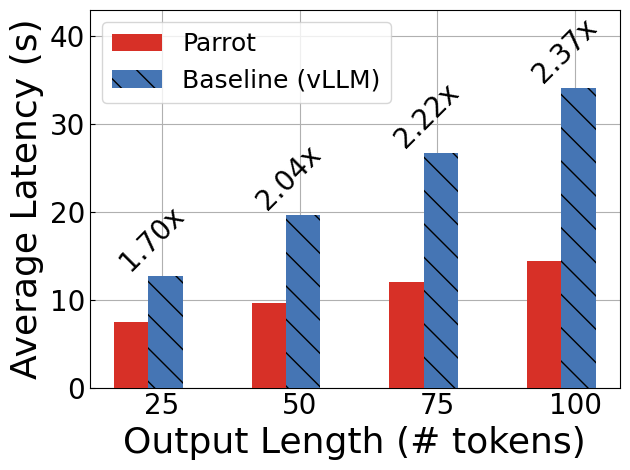

In [32]:
# Organize the data
data = {
    "parrot": parrot,
    "vllm": vllm,
}

names = {
    "parrot": "Parrot",
    "vllm": "Baseline (vLLM)",
}

statistics = {ol: {s: [] for s in systems} for ol in output_lengths}

for system, system_data in data.items():
    for key, value in system_data.items():
        outlen = key[2]
        statistics[outlen][system].append(value)

# Calculate statistics
averages = {ol: {s: np.mean(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}
# mins = {ol: {s: np.min(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}
# maxs = {ol: {s: np.max(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}

# Generate the chart
x = np.arange(len(output_lengths))
width = 0.25

fig, ax = plt.subplots()


plt.grid(True)
for i, system in enumerate(systems):
    avg = [averages[ol][system] for ol in output_lengths]
#     min_ = [mins[ol][system] for ol in output_lengths]
#     max_ = [maxs[ol][system] for ol in output_lengths]
    
    rects = ax.bar(x - width/2 + i*width, avg, width,  hatch = hatches[i], color = colors[i], label=names[system],zorder=3) # hatches
    
    # Add speedup values
    if system != 'parrot':
        speedup_values = [averages[ol][system]/averages[ol]['parrot'] for ol in output_lengths]
        for rect, speedup in zip(rects, speedup_values):
            height = rect.get_height()
            diff = 0.1 if system == 'vllm' else -0.1
            ax.text(rect.get_x() + rect.get_width() / 2 -diff, height,
                    '{:.2f}x'.format(speedup),
                    ha='center', va='bottom', rotation=45,
                    fontsize=20)
            
plt.legend(loc='upper left', prop = { "size": 18 },)
ax.tick_params(axis='y', labelsize=20, direction='in')
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.set_xlabel('Output Length (# tokens)', fontsize=26)
ax.set_ylabel('Average Latency (s)', fontsize=26)
ax.set_xticks([_+0.1 for _ in x])
ax.set_xticklabels(output_lengths)
plt.ylim([0,43])

fig.tight_layout()

plt.savefig('mapreduce-olen.pdf')